# DIABETES PREDICTION

In [362]:
#Importing Dependencies

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Data Collection and Analysis
#PIMA Diabetes Dataset

In [363]:
#loading the dataset to a pandas df
df = pd.read_csv('C:/Users/vaish/18-02-2023/21-02-2023/diabetes-prediction-master/diabetes.csv')

In [364]:
#printing the first 5 rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [365]:
#no of rows and cols
df.shape

(768, 9)

In [366]:
#getting the statistical measures of the df
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.347656
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476537
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [367]:
#no of diabetics and non-diabetics
df['Outcome'].value_counts()

0    501
1    267
Name: Outcome, dtype: int64

In [368]:
#0 --> Non-Diabetic
#1 --> Diabetic

# Data Cleaning

In [369]:
# Drop duplicates

In [370]:
print('Before dropping duplicates: ', df.shape)

Before dropping duplicates:  (768, 9)


In [371]:
df = df.drop_duplicates()

In [372]:
print('After dropping duplicates: ', df.shape)

After dropping duplicates:  (768, 9)


In [373]:
#Check for NULL values

In [374]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [375]:
#Check for missing values

In [376]:
print('No of missing values in Glucose: ', df[df['Glucose'] == 0].shape[0])
print('No of missing values in BloodPressure: ', df[df['BloodPressure'] == 0].shape[0])
print('No of missing values in SkinThickness: ', df[df['SkinThickness'] == 0].shape[0])
print('No of missing values in Insulin: ', df[df['Insulin'] == 0].shape[0])
print('No of missing values in BMI: ', df[df['BMI'] == 0].shape[0])

No of missing values in Glucose:  5
No of missing values in BloodPressure:  35
No of missing values in SkinThickness:  227
No of missing values in Insulin:  374
No of missing values in BMI:  11


In [377]:
#Replace missing values with mean

In [378]:
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].mean())
df['BMI'] = df['BMI'].replace(0, df['BMI'].mean())

In [379]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.347656
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476537
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Data Visualisation

In [380]:
#Count plot

Text(0, 0.5, '')

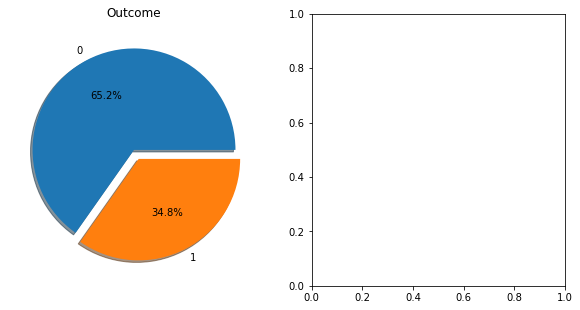

In [381]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1,2,figsize=(10,5))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')

In [382]:
import seaborn as sns
sns.countplot('Outcome', data=df, ax=ax[1])
ax[1].set_title('Outcome')
N, P = df['Outcome'].value_counts()
print('Negative(0) ->', N)
print('Positive(1) ->', P)

Negative(0) -> 501
Positive(1) -> 267


C:\Users\vaish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


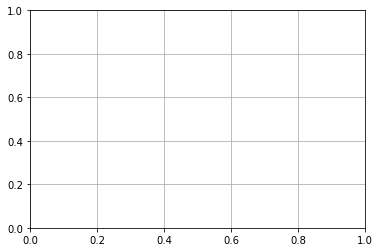

In [383]:
plt.grid()
plt.show()

In [384]:
#Dataset is not balanced

In [385]:
#Histogram (data is balanced or skewed)

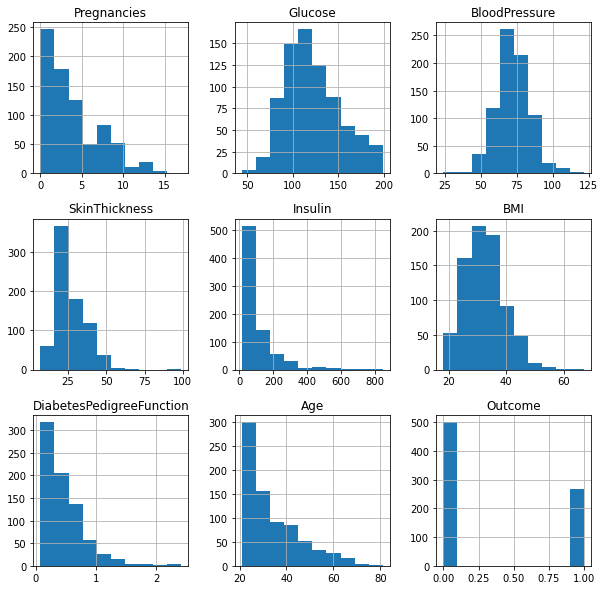

In [386]:
df.hist(bins=10,figsize=(10,10))
plt.show()

In [387]:
#Analysing relationships bw variables

In [388]:
#Correlation analysis

In [389]:
#get correlations of each feature in the dataset
corr_mat = df.corr()
top_corr_features = corr_mat.index
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

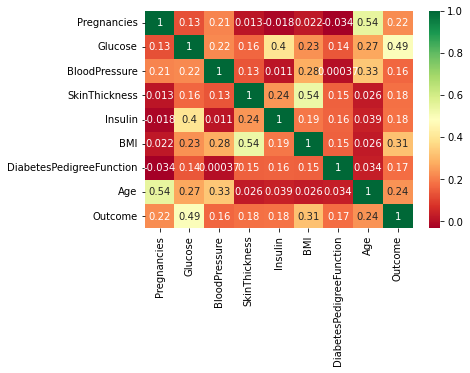

In [390]:
#plot heat map
g = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [391]:
#Split data into X and y

In [392]:
#separating the independent and dependent variables
X = df.drop(columns='Outcome', axis=1)
y = df['Outcome']
print(X.head())
print(y.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0      35.000000   79.799479  33.6   
1            1     85.0           66.0      29.000000   79.799479  26.6   
2            8    183.0           64.0      20.536458   79.799479  23.3   
3            1     89.0           66.0      23.000000   94.000000  28.1   
4            0    137.0           40.0      35.000000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [393]:
#Data Standardisation - Feature Scaling

In [394]:
scaler = StandardScaler()
scaler.fit(X)
standardised_data = scaler.transform(X)
print(standardised_data)

[[ 0.63994726  0.86527574 -0.0210444  ...  0.16725546  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20598931 -0.51658286 ... -0.85153454 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01597855 -0.68176235 ... -1.33182125  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02240928 -0.0210444  ... -0.90975111 -0.68519336
  -0.27575966]
 [-0.84488505  0.14197684 -1.01212132 ... -0.34213954 -0.37110101
   1.17073215]
 [-0.84488505 -0.94297153 -0.18622389 ... -0.29847711 -0.47378505
  -0.87137393]]


In [395]:
X = standardised_data
y = df.Outcome
print(X)
print(y)

[[ 0.63994726  0.86527574 -0.0210444  ...  0.16725546  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20598931 -0.51658286 ... -0.85153454 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01597855 -0.68176235 ... -1.33182125  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02240928 -0.0210444  ... -0.90975111 -0.68519336
  -0.27575966]
 [-0.84488505  0.14197684 -1.01212132 ... -0.34213954 -0.37110101
   1.17073215]
 [-0.84488505 -0.94297153 -0.18622389 ... -0.29847711 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [396]:
#Split data into training and testing data

In [397]:
#80% is train, 20% is test
#random state is used to ensure a specific split

In [398]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [399]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [400]:
#Classification Models

In [401]:
#1)Logistic Regression

from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='liblinear', multi_class='ovr')
lr_model.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [402]:
#2)K Neighbours Classifier

from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [403]:
#3)Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [404]:
#4)Support Vector Machine(SVM)

from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [405]:
#5)Decision tree

from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

# Predicting & Evaluating the Models

In [406]:
#make the predictions using test data for all 6 models
lr_preds = lr_model.predict(X_test)

knn_preds = knn_model.predict(X_test)

nb_preds = nb_model.predict(X_test)

svm_preds = svm_model.predict(X_test)

dt_preds = dt_model.predict(X_test)

rf_preds = rf_model.predict(X_test)

In [407]:
#get the accuracy of the models
print('Accuracy score of Logistic Regression:', round(accuracy_score(y_test, lr_preds) * 100, 2))
print('Accuracy score of KNN:', round(accuracy_score(y_test, knn_preds) * 100, 2))
print('Accuracy score of Naive Bayes:', round(accuracy_score(y_test, nb_preds) * 100, 2))
print('Accuracy score of SVM:', round(accuracy_score(y_test, svm_preds) * 100, 2))
print('Accuracy score of Decision Tree:', round(accuracy_score(y_test, dt_preds) * 100, 2))
print('Accuracy score of Random Forest:', round(accuracy_score(y_test, rf_preds) * 100, 2))

Accuracy score of Logistic Regression: 77.27
Accuracy score of KNN: 74.68
Accuracy score of Naive Bayes: 74.03
Accuracy score of SVM: 83.12
Accuracy score of Decision Tree: 75.32
Accuracy score of Random Forest: 77.27


# Save the Model with the Highest Accuracy using pickle

In [408]:
import pickle
pickle.dump(svm_model, open('svm_model.pkl', 'wb')) #svm has the highest accuracy

In [409]:
pickle.dump(scaler, open('scaler.pkl', 'wb')) #save the std scaler too